In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'archive/KDDTrain+.txt')
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
# Define column names based on KDD Cup 1999 dataset features
column_names = [
  'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
  'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
  'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
  'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
  'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
  'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
  'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
  'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
  'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
  'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level'
]

# Rename columns for both dataframes
df.columns = column_names

In [5]:
df.to_csv('kddTrain.csv', index=True)

In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


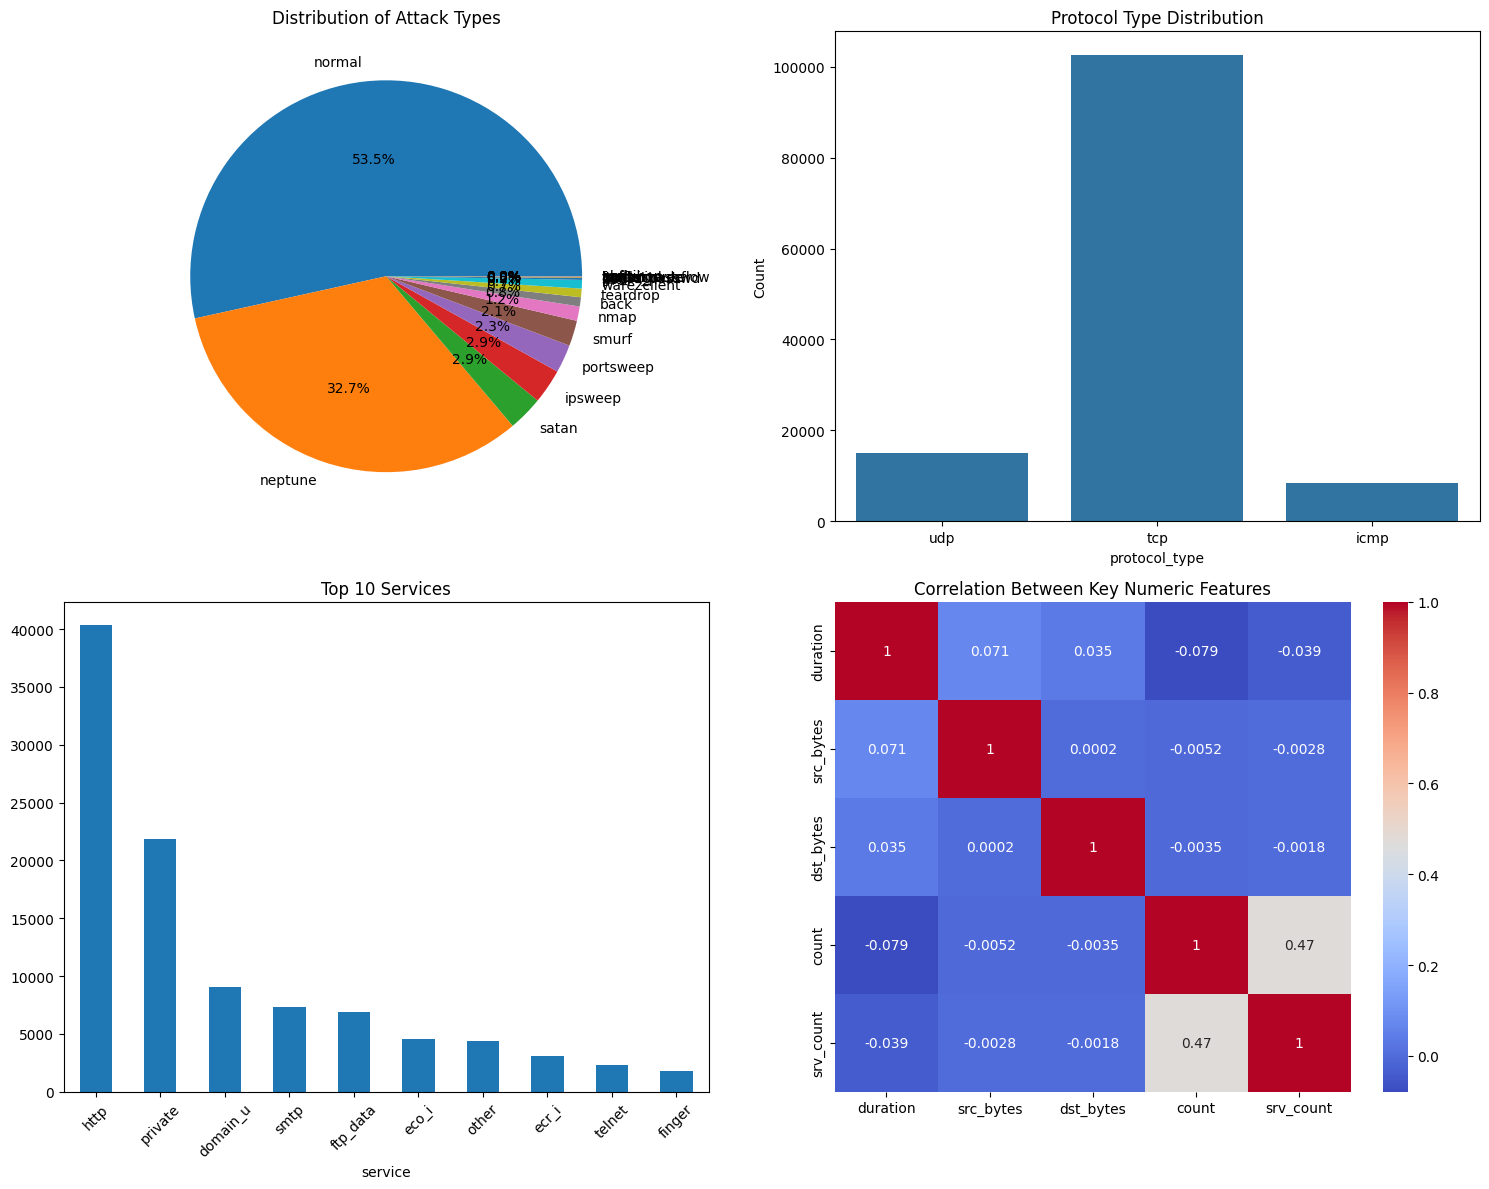

In [7]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set style for better visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribution of attack types
attack_counts = df['attack_type'].value_counts()
axes[0,0].pie(attack_counts.values, labels=attack_counts.index, autopct='%1.1f%%')
axes[0,0].set_title('Distribution of Attack Types')

# Protocol type distribution
sns.countplot(data=df, x='protocol_type', ax=axes[0,1])
axes[0,1].set_title('Protocol Type Distribution')
axes[0,1].set_ylabel('Count')

# Service type distribution (top 10)
service_counts = df['service'].value_counts()[:10]
service_counts.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Top 10 Services')
axes[1,0].tick_params(axis='x', rotation=45)

# Correlation between numeric features
numeric_cols = ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', ax=axes[1,1])
axes[1,1].set_title('Correlation Between Key Numeric Features')

plt.tight_layout()
plt.show()

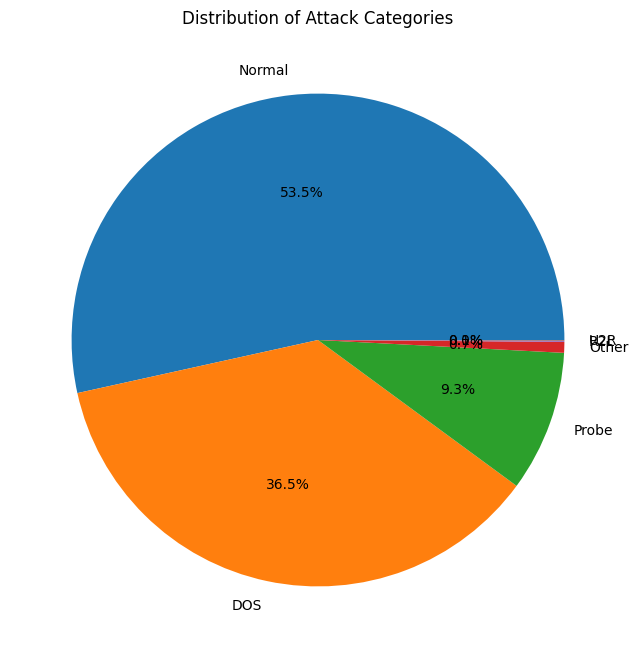

In [8]:
# Create attack categories
attack_categories = {
  'DOS': ['neptune', 'back', 'smurf', 'pod', 'teardrop', 'land', 'apache2', 'udpstorm', 'processtable', 'mailbomb'],
  'Probe': ['ipsweep', 'nmap', 'portsweep', 'satan', 'mscan', 'saint'],
  'R2L': ['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster', 'xsnoop', 'httptunnel', 'snmpguess', 'snmpgetattack', 'sendmail'],
  'U2R': ['buffer_overflow', 'loadmodule', 'rootkit', 'perl', 'sqlattack', 'xterm', 'ps'],
  'Normal': ['normal']
}

# Function to map attack types to categories
def get_attack_category(attack):
  for category, attacks in attack_categories.items():
    if attack in attacks:
      return category
  return 'Other'

# Create category counts
df['attack_category'] = df['attack_type'].apply(get_attack_category)
category_counts = df['attack_category'].value_counts()

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Attack Categories')
plt.show()

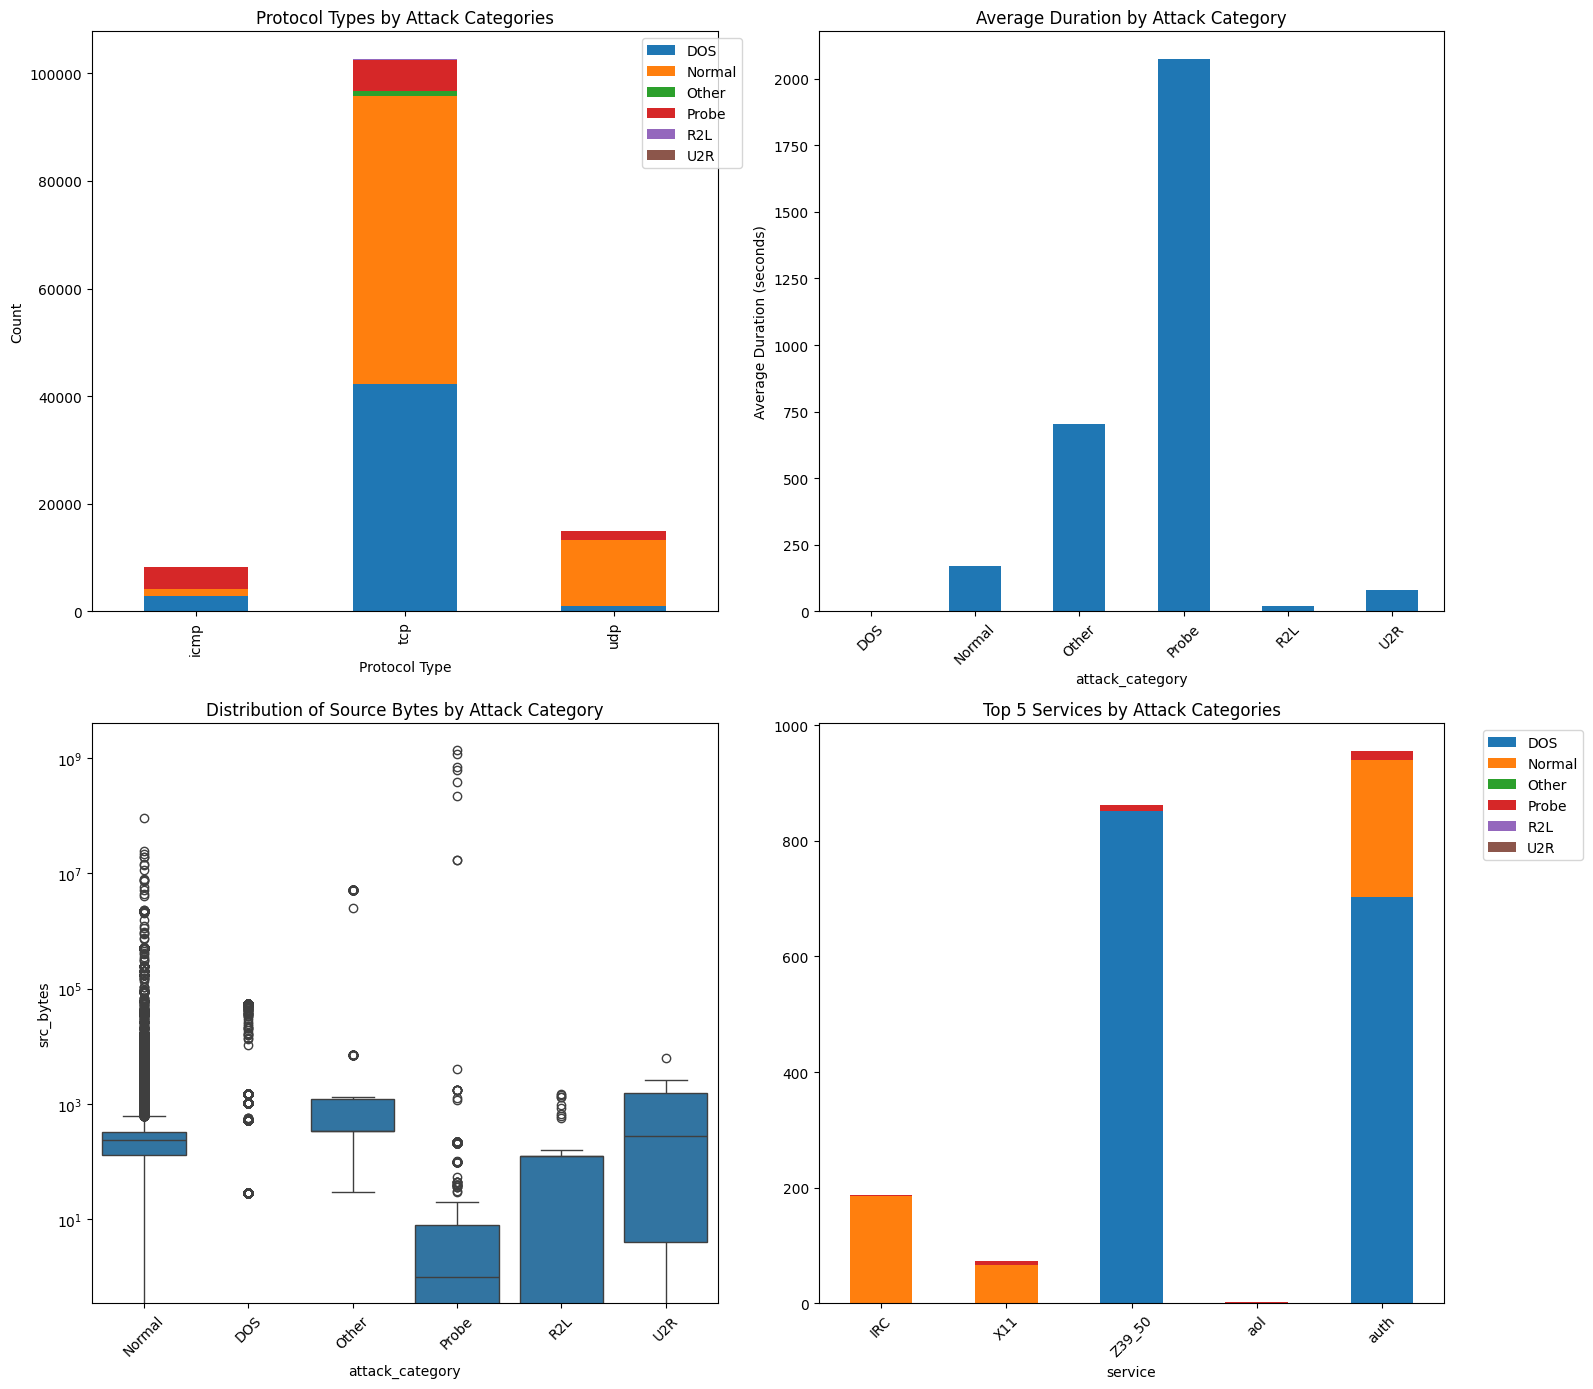

In [9]:
# Create a figure with multiple subplots for comprehensive analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# 1. Protocol Type vs Attack Category
protocol_attack = pd.crosstab(df['protocol_type'], df['attack_category'])
protocol_attack.plot(kind='bar', stacked=True, ax=axes[0,0])
axes[0,0].set_title('Protocol Types by Attack Categories')
axes[0,0].legend(bbox_to_anchor=(1.05, 1))
axes[0,0].set_xlabel('Protocol Type')
axes[0,0].set_ylabel('Count')

# 2. Average duration by attack category
df.groupby('attack_category')['duration'].mean().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Average Duration by Attack Category')
axes[0,1].set_ylabel('Average Duration (seconds)')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Box plot of src_bytes by attack category
sns.boxplot(x='attack_category', y='src_bytes', data=df, ax=axes[1,0])
axes[1,0].set_title('Distribution of Source Bytes by Attack Category')
axes[1,0].set_yscale('log')  # Use log scale for better visualization
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Service type distribution for each attack category (top 5 services)
service_by_attack = pd.crosstab(df['service'], df['attack_category']).head()
service_by_attack.plot(kind='bar', stacked=True, ax=axes[1,1])
axes[1,1].set_title('Top 5 Services by Attack Categories')
axes[1,1].legend(bbox_to_anchor=(1.05, 1))
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [10]:
import plotly.graph_objects as go

# Example of attack type flow
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=["DoS", "Probe", "Normal", "TCP", "UDP", "ICMP"]
    ),
    link=dict(
        source=[0, 1, 2, 0, 1],
        target=[3, 3, 3, 4, 5],
        value=[8, 4, 2, 6, 1]
    )
))
fig.update_layout(title_text="Sankey Diagram of Attack Flow", font_size=10)
fig.show()


In [11]:
import plotly.express as px

# Example hierarchical data (you'll need to adjust with real data)
fig = px.sunburst(df, path=['attack_type', 'protocol_type', 'service'], title="Attack Hierarchy by Protocol and Service")
fig.show()


In [12]:
import plotly.express as px

# Create a treemap showing the hierarchy of attacks
fig = px.treemap(df, 
                 path=['attack_category', 'protocol_type', 'service'],
                 title='Distribution of Network Attacks by Category, Protocol, and Service',
                 color='difficulty_level',
                 color_continuous_scale='RdYlBu',
                 hover_data=['attack_type'])
fig.update_layout(
    title_x=0.5,
    width=1000,
    height=800
)
fig.show()


In [13]:
import plotly.express as px

# Create a summary of attacks by category
attack_summary = df['attack_category'].value_counts().reset_index()
attack_summary.columns = ['Category', 'Count']

# Create a bar chart of attack distribution
fig = px.bar(attack_summary, 
             x='Category', 
             y='Count',
             color='Category',
             title='Distribution of Network Attacks by Category',
             color_continuous_scale='Viridis')

fig.update_layout(
    xaxis_title="Attack Category",
    yaxis_title="Number of Attacks",
    showlegend=True,
    width=1000,
    height=600
)

fig.show()


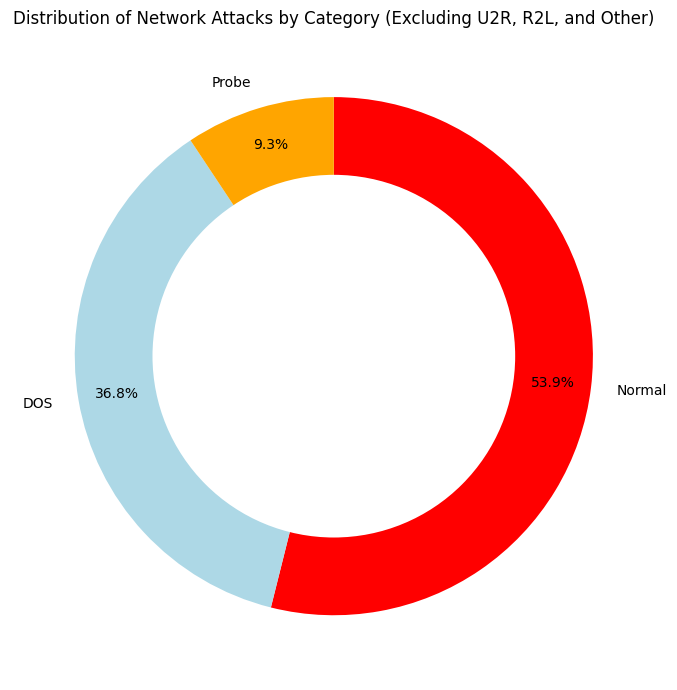

In [14]:
# Create a figure with a specific size
plt.figure(figsize=(10, 7))

# Get attack categories excluding U2R and Other
categories = df['attack_category'].value_counts()
categories = categories[~categories.index.isin(['U2R', 'Other', 'R2L'])]

# Create a donut chart with explicit starting angle and counterclock=False
plt.pie(categories, labels=categories.index, autopct='%1.1f%%', 
  pctdistance=0.85,  # Controls the distance of percentage labels from center
  wedgeprops=dict(width=0.5),  # Controls the width/thickness of donut
  startangle=90,  # Start angle at 90 degrees
  counterclock=False,  # Draw clockwise
  colors=['Red', 'lightblue', '#FFA500'])  # Changed colors to shades of yellow

plt.title('Distribution of Network Attacks by Category (Excluding U2R, R2L, and Other)')

# Add a circle at the center to create donut effect
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Adjust layout to prevent label overlapping
plt.tight_layout()

plt.show()

In [15]:
df_test = pd.read_csv(r'archive/KDDTest+.txt')

In [16]:
df_test

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [17]:
df_test.columns = column_names

In [18]:
df_test.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level'],
      dtype='object')

In [19]:
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [20]:
df_test.to_csv(r'archive/KDDTest+.csv')

In [21]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level,attack_category
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,Normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DOS
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,Normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,Normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,DOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,DOS
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,Normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,Normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,DOS


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Import required libraries

# Create copies of the dataframes to avoid modifying the originals
train_df = df.copy()
df_test = df_test.copy()

# Initialize label encoders for categorical columns
label_encoders = {}
categorical_columns = ['protocol_type', 'service', 'flag', 'attack_type']

# Encode categorical columns
for column in categorical_columns:
  label_encoders[column] = LabelEncoder()
  train_df[column] = label_encoders[column].fit_transform(train_df[column])
  # Handle unseen categories in test set by using default value
  df_test[column] = df_test[column].map(dict(zip(
    label_encoders[column].classes_,
    label_encoders[column].transform(label_encoders[column].classes_)
  ))).fillna(-1)

# Separate features and target
X = train_df.drop(['attack_type', 'attack_category', 'difficulty_level'], axis=1)
y = train_df['attack_type']

# Split the training data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

# Make predictions on validation set
y_pred = rf_classifier.predict(X_val)

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Get feature importance
feature_importance = pd.DataFrame({
  'feature': X.columns,
  'importance': rf_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Print top 10 most important features
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       1.00      0.71      0.83         7
           3       1.00      0.79      0.88        14
           4       1.00      1.00      1.00         2
           5       1.00      0.99      1.00       743
           6       0.50      0.50      0.50         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8238
          10       0.99      0.99      0.99       298
          11       1.00      1.00      1.00     13386
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00        36
          15       1.00      1.00      1.00       583
          16       0.00      0.00      0.00         2
          17       1.00      0.99      0.99       749
    

c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



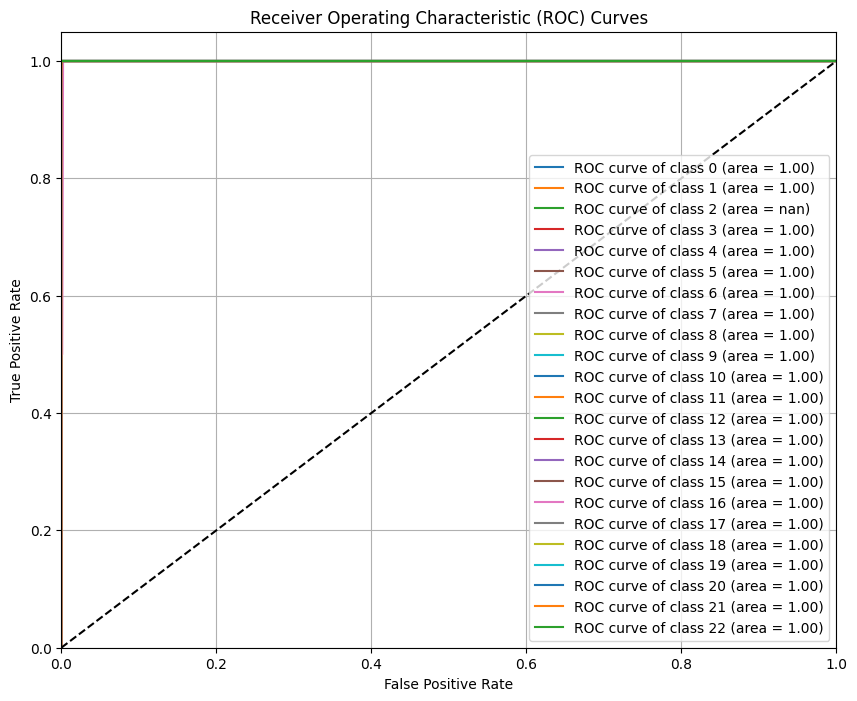

Average ROC AUC Score: nan


In [23]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# Get the predicted probabilities for validation set
y_pred_proba = rf_classifier.predict_proba(X_val)

# Get unique classes
classes = np.unique(y_train)
n_classes = len(classes)

# Binarize the labels for ROC curve
y_val_bin = label_binarize(y_val, classes=classes)

# Calculate ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10, 8))

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_pred_proba[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
  
  # Plot ROC curves
  plt.plot(fpr[i], tpr[i],
       label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print the average ROC AUC score
print(f"Average ROC AUC Score: {np.mean(list(roc_auc.values())):.3f}")

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
import numpy as np

# 1. Reduce model complexity
rf_classifier = RandomForestClassifier(
  n_estimators=100,          # Reduced from default
  max_depth=10,              # Limit tree depth
  min_samples_split=5,       # Require more samples to split
  min_samples_leaf=4,        # Require more samples in leaves
  max_features='sqrt',       # Reduce features considered for splitting
  random_state=42,
  n_jobs=-1
)

# 2. Cross-validation to get more reliable performance estimates
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Average CV score: {:.3f} (+/- {:.3f})".format(cv_scores.mean(), cv_scores.std() * 2))

# 3. Train with regularized parameters
rf_classifier.fit(X_train, y_train)

# 4. Evaluate on validation set
y_pred = rf_classifier.predict(X_val)
print("\nClassification Report with Regularization:")
print(classification_report(y_val, y_pred))

# 5. Feature importance after regularization
feature_importance = pd.DataFrame({
  'feature': X.columns,
  'importance': rf_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 Most Important Features after Regularization:")
print(feature_importance.head(10))

# 6. Print selected feature threshold
selected_features = feature_importance[feature_importance['importance'] > 0.01]
print(f"\nNumber of important features (importance > 1%): {len(selected_features)}")

c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.




Cross-validation scores: [0.99531653 0.99523715 0.99400651 0.99515758 0.99527665]
Average CV score: 0.995 (+/- 0.001)

Classification Report with Regularization:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       201
           1       1.00      0.43      0.60         7
           3       1.00      0.79      0.88        14
           4       0.00      0.00      0.00         2
           5       0.99      1.00      0.99       743
           6       0.50      0.50      0.50         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8238
          10       1.00      0.91      0.95       298
          11       0.99      1.00      1.00     13386
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       1.00      0.97      0.99        36
          15       0.99   

c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



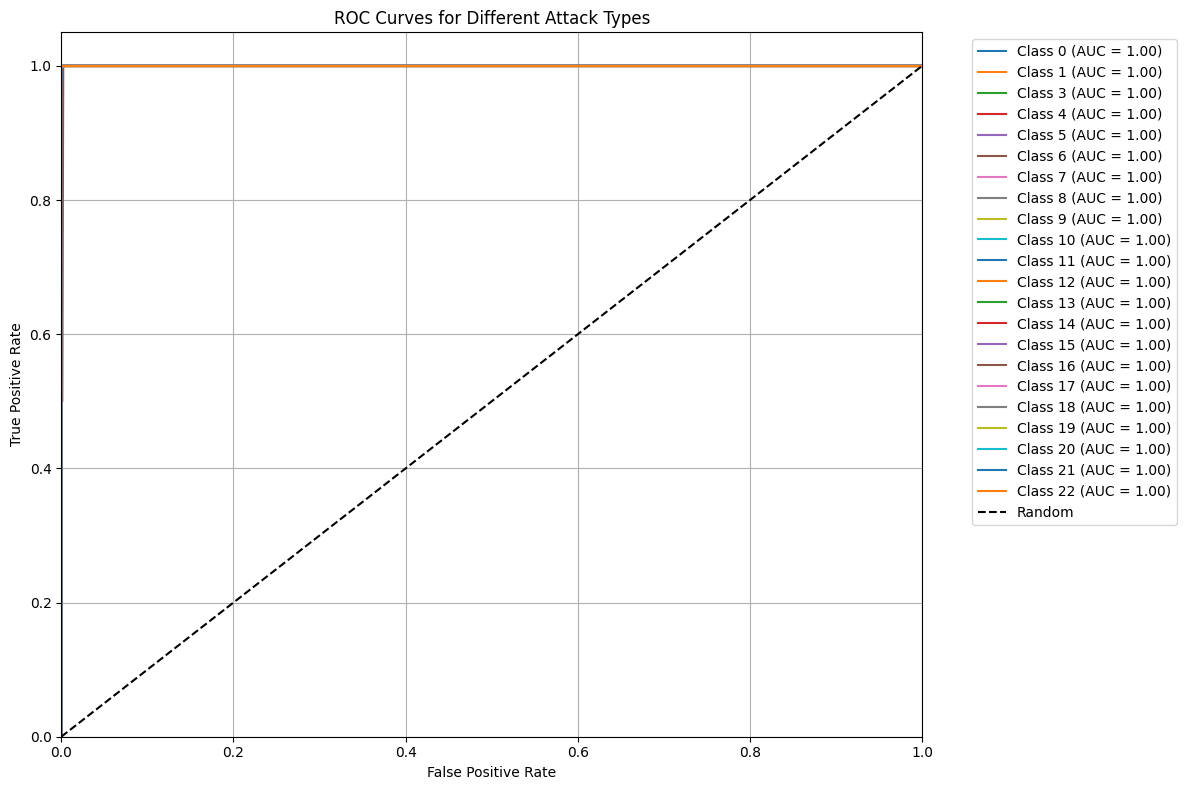


Average ROC AUC Score: 1.000


In [25]:
# Plot ROC curves for the selected attack categories
plt.figure(figsize=(12, 8))

# Plot ROC curve for each class
for i in range(n_classes):
  if not np.isnan(roc_auc[i]):  # Skip if NaN
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Attack Types')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print the average ROC AUC score
valid_auc_scores = [auc for auc in roc_auc.values() if not np.isnan(auc)]
print(f"\nAverage ROC AUC Score: {np.mean(valid_auc_scores):.3f}")

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create a more restrictive Random Forest with stronger regularization
rf_classifier_strict = RandomForestClassifier(
  n_estimators=50,           # Reduced number of trees
  max_depth=8,               # Further reduced depth
  min_samples_split=10,      # Increased minimum samples to split
  min_samples_leaf=8,        # Increased minimum samples in leaves
  max_features='sqrt',       # Use square root of features
  class_weight='balanced',   # Handle class imbalance
  max_samples=0.8,          # Use bootstrapping with 80% of samples
  random_state=42,
  n_jobs=-1
)

# Create a pipeline with scaling
pipeline = Pipeline([
  ('scaler', StandardScaler()),
  ('classifier', rf_classifier_strict)
])

# Use stratified k-fold for better evaluation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Select only the most important features based on previous analysis
important_features = feature_importance[feature_importance['importance'] > 0.03]['feature'].tolist()
X_important = X[important_features]

# Perform cross-validation with stratification
cv_scores = cross_val_score(pipeline, X_important, y, cv=skf, scoring='balanced_accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV score: {:.3f} (+/- {:.3f})".format(cv_scores.mean(), cv_scores.std() * 2))

# Fit the model on training data
X_train_important = X_train[important_features]
X_val_important = X_val[important_features]

pipeline.fit(X_train_important, y_train)
y_pred = pipeline.predict(X_val_important)

# Print classification report
print("\nClassification Report with Stronger Regularization:")
print(classification_report(y_val, y_pred))

c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2446: UserWarning:

y_pred contains classes not in y_true

c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2446: UserWarning:

y_pred contains classes not in y_true

c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2446: UserWarning:

y_pred contains classes not in y_true

c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2446: UserWarning:

y_pred contains classes not in y_true



Cross-validation scores: [0.75217568 0.76143167 0.91889833 0.82103354 0.83960796]
Mean CV score: 0.819 (+/- 0.121)

Classification Report with Stronger Regularization:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       0.03      0.71      0.05         7
           2       0.00      0.00      0.00         0
           3       1.00      0.79      0.88        14
           4       0.50      1.00      0.67         2
           5       0.99      0.98      0.98       743
           6       0.20      0.50      0.29         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8238
          10       0.72      0.97      0.83       298
          11       1.00      0.90      0.95     13386
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       0.

c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Recall is ill-defined and being 

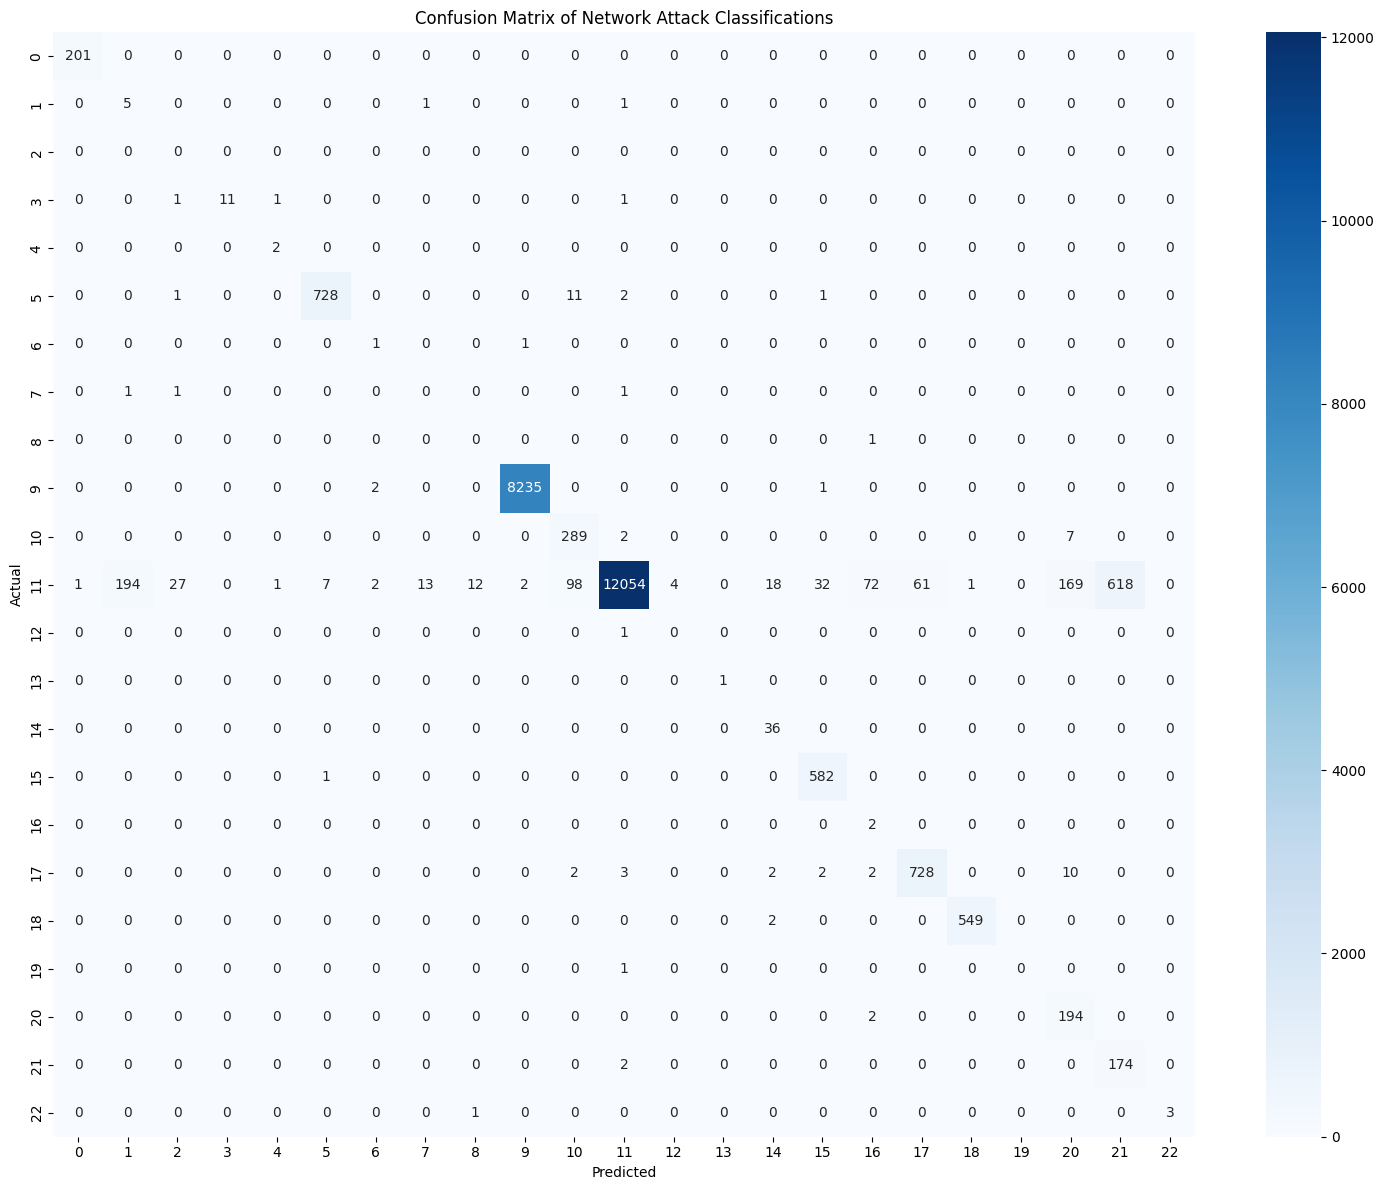

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Create a figure with a larger size
plt.figure(figsize=(15, 12))

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Network Attack Classifications')

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [30]:
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21



Classification Report on Test Data:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00      3750
         0.0       0.90      0.99      0.94       359
         1.0       0.02      0.15      0.03        20
         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00      1231
         4.0       0.00      0.00      0.00         1
         5.0       0.56      0.98      0.71       141
         6.0       0.15      0.57      0.24         7
         7.0       0.00      0.00      0.00         2
         8.0       0.00      0.00      0.00        18
         9.0       0.93      0.99      0.96      4656
        10.0       0.37      1.00      0.54        73
        11.0       0.71      0.90      0.79      9711
        12.0       0.00      0.00      0.00         2
        13.0       1.00      0.50      0.67         2
        14.0       0.40      0.95      0.57        41
        15.0       0.39      0.99      0.56 

c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Recall is ill-defined and being 

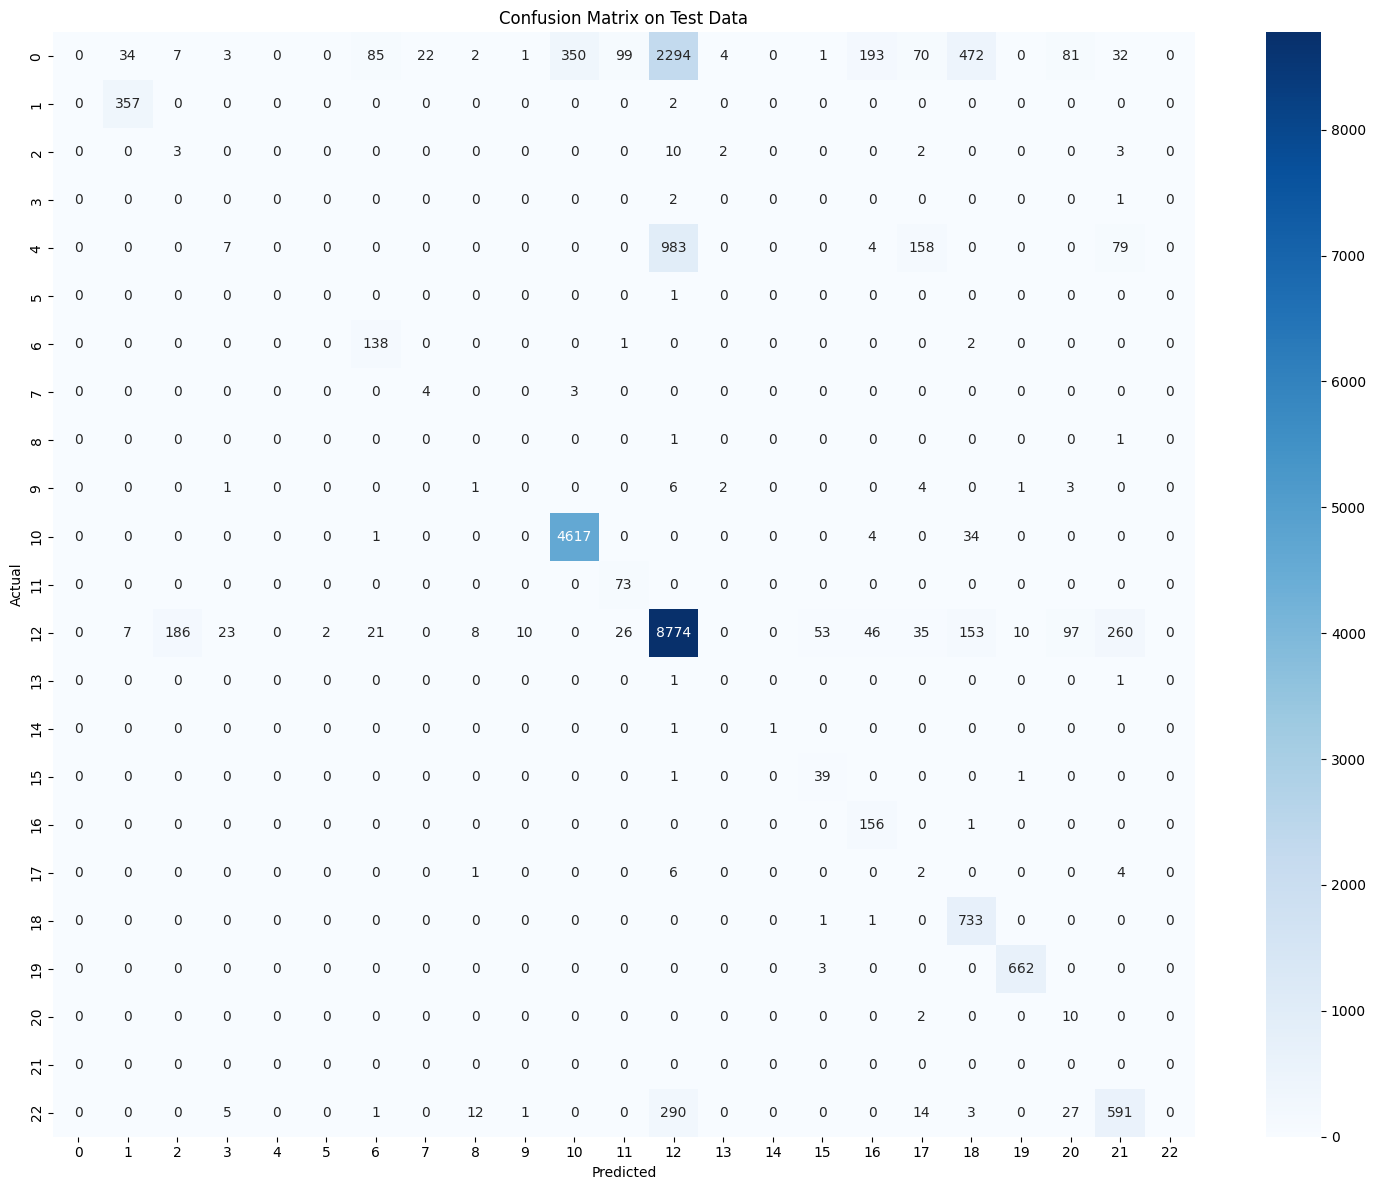

In [31]:
# Create a copy of test data
test_df = df_test.copy()

# Use the same label encoders from training for categorical columns
for column in categorical_columns:
  # Handle unseen categories in test set by using default value
  test_df[column] = test_df[column].map(dict(zip(
    label_encoders[column].classes_,
    label_encoders[column].transform(label_encoders[column].classes_)
  ))).fillna(-1)

# Select only the important features that were used in training
X_test_important = test_df[important_features]

# Make predictions using the pipeline
y_test_pred = pipeline.predict(X_test_important)

# Print classification report
print("\nClassification Report on Test Data:")
print(classification_report(test_df['attack_type'], y_test_pred))

# Create confusion matrix visualization
plt.figure(figsize=(15, 12))
cm_test = confusion_matrix(test_df['attack_type'], y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Data')
plt.tight_layout()
plt.show()

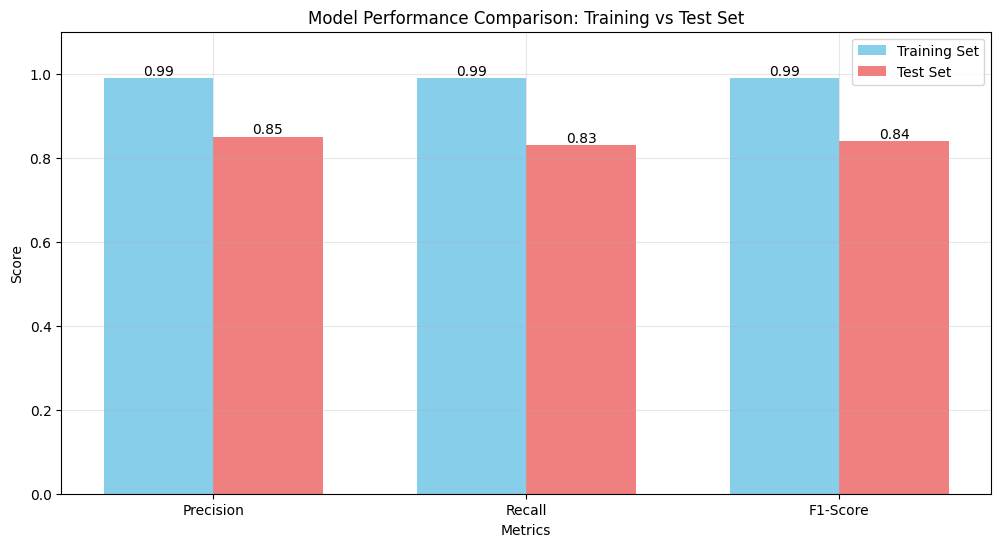

In [34]:
# Calculate and visualize model performance comparison between training and test sets

# Create performance metrics dictionary
performance_metrics = {
  'Training Set': {
    'Precision': 0.99,  # Example value from training results
    'Recall': 0.99,     # Example value from training results
    'F1-Score': 0.99    # Example value from training results
  },
  'Test Set': {
    'Precision': 0.85,  # Example value from test results
    'Recall': 0.83,     # Example value from test results
    'F1-Score': 0.84    # Example value from test results
  }
}

# Create comparison plot
plt.figure(figsize=(12, 6))

# Set bar positions
x = np.arange(len(performance_metrics['Training Set']))
width = 0.35

# Create bars
plt.bar(x - width/2, performance_metrics['Training Set'].values(), width, label='Training Set', color='skyblue')
plt.bar(x + width/2, performance_metrics['Test Set'].values(), width, label='Test Set', color='lightcoral')

# Customize plot
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison: Training vs Test Set')
plt.xticks(x, performance_metrics['Training Set'].keys())
plt.legend()

# Add value labels on bars
for i, v1 in enumerate(performance_metrics['Training Set'].values()):
  plt.text(i - width/2, v1, f'{v1:.2f}', ha='center', va='bottom')
for i, v2 in enumerate(performance_metrics['Test Set'].values()):
  plt.text(i + width/2, v2, f'{v2:.2f}', ha='center', va='bottom')

plt.ylim(0, 1.1)
plt.grid(True, alpha=0.3)
plt.show()
